In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataclasses import dataclass
import pathlib

In [2]:
@dataclass(frozen=True)
class DatasetConfig:
    SEED_VALUE:  int = 41
    CUT_PLANE:   str = "coronal"
         
    DATA_ROOT_SOURCE_PATH: str = '/home/jovyan/data/auto-pet-iii/2024-05-10_Autopet_v1.1'
    MAIN_DATA_CSV_PATH: str = DATA_ROOT_SOURCE_PATH + '/fdg_metadata.csv'
    DATA_ROOT_TARGET:  str = f'/home/jovyan/data/segmentation/autopet-full-{CUT_PLANE}' 
    DATA_ROOT_TRAIN:  str = DATA_ROOT_TARGET + '/Train' 
    DATA_ROOT_VALID:  str = DATA_ROOT_TARGET + '/Valid'
    DATA_ROOT_TEST:   str = DATA_ROOT_TARGET + '/Test'
    DATA_TEST_GT:     str = DATA_ROOT_TARGET + '/Test.csv'

In [3]:
# train, val and test split

In [4]:
data_df = pd.read_csv(DatasetConfig.DATA_ROOT_TARGET + "/data_description.csv")
data_df

,Unnamed: 0,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
...,...,...,...,...,...,...,...,...,...,...,...
25965,25965,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,211,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
25966,25966,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,212,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
25967,25967,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,213,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
25968,25968,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,214,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400


In [5]:
data_df.diagnosis.value_counts()

diagnosis
POSITIVE    25970
Name: count, dtype: int64

In [6]:
col_names = data_df.columns.to_list()
col_names[0] = "imageId"
col_names

['imageId',
 'Subject ID',
 'Study UID',
 'diagnosis',
 'condition',
 'sliceNum',
 'totalSlices',
 'imagePath',
 'segPath',
 'height',
 'width']

In [7]:
data_df.columns = col_names
data_df.head()

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400


In [8]:
# new height will be based on the mean value
data_df.height.describe()

count    25970.000000
mean       346.512630
std         95.206246
min        242.000000
25%        284.000000
50%        326.000000
75%        326.000000
max        661.000000
Name: height, dtype: float64

In [9]:
data_df[data_df.height > 395]

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width
149,149,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,177,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
150,150,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,178,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
151,151,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,179,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
152,152,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,180,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
153,153,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,181,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
...,...,...,...,...,...,...,...,...,...,...,...
25547,25547,PETCT_4776e75543,1.3.6.1.4.1.14519.5.2.1.4219.6651.323483836183...,POSITIVE,MELANOMA,207,400,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,649,400
25548,25548,PETCT_4776e75543,1.3.6.1.4.1.14519.5.2.1.4219.6651.323483836183...,POSITIVE,MELANOMA,208,400,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,649,400
25549,25549,PETCT_4776e75543,1.3.6.1.4.1.14519.5.2.1.4219.6651.323483836183...,POSITIVE,MELANOMA,209,400,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,649,400
25550,25550,PETCT_4776e75543,1.3.6.1.4.1.14519.5.2.1.4219.6651.323483836183...,POSITIVE,MELANOMA,210,400,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,649,400


In [10]:
data_df[data_df.height <= 395]

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
...,...,...,...,...,...,...,...,...,...,...,...
25965,25965,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,211,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
25966,25966,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,212,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
25967,25967,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,213,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
25968,25968,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,214,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400


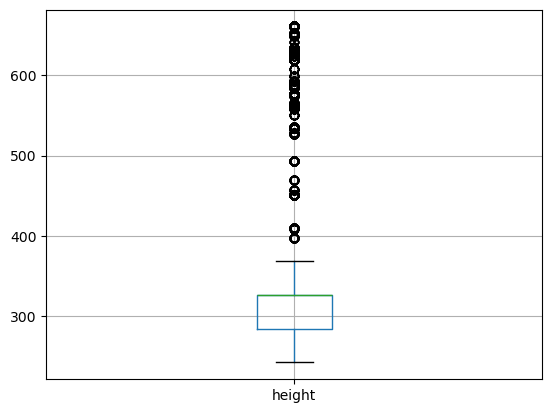

In [11]:
data_df.boxplot(column=["height"])
plt.show()

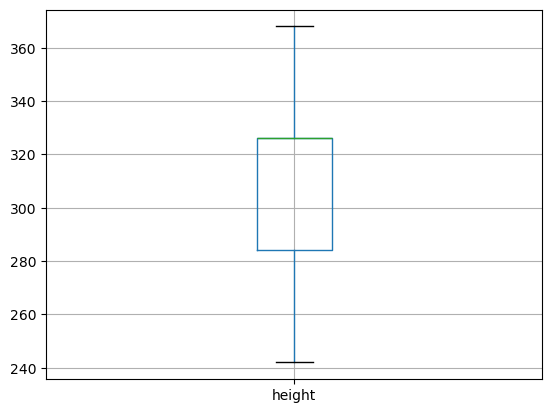

In [12]:
data_df[data_df.height <= 395].boxplot(column=["height"])
plt.show()

In [13]:
data_df[data_df.height <= 395].height.max()

368

In [14]:
data_df.condition.value_counts()

condition
LUNG_CANCER    10281
MELANOMA        8407
LYMPHOMA        7282
Name: count, dtype: int64

In [15]:
# verify distribution of conditions with this filter applied
data_df[data_df.height <= 395].condition.value_counts()

condition
LUNG_CANCER    10281
LYMPHOMA        6933
MELANOMA        5076
Name: count, dtype: int64

The filter applied right above shows that most of the images with a discrepant height petrain to the MELANOMA condition.

Since the final images will be resized to the 1024x1024 size and the image with highest height has 661px, all images will be maintained.

In [16]:
# keep original df and filter the data_df
# original_df = data_df.copy()
# data_df = data_df[data_df.height <= 395].copy()

# Split and Export Images

In [17]:
@dataclass(frozen=True)
class ImageResizeConfig:
    height: int = 368
    width: int = 400

In [18]:
def pre_process_and_export_record(row, is_segmentation=False):
    image_path = DatasetConfig.DATA_ROOT_TARGET + (row["segPath"] if is_segmentation else row["imagePath"])
    img = cv2.imread(image_path)
    # img = cv2.resize(img, (ImageResizeConfig.height, ImageResizeConfig.width))
    # image resize removed
    img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    
    img_modality = "SEG" if is_segmentation else "PET"
    
    destination_path = f"{DatasetConfig.DATA_ROOT_TARGET}/{row.subset}/{img_modality}"
    pathlib.Path(destination_path).mkdir(parents=True, exist_ok=True)
    destination_path = f"{destination_path}/{row.imageId}.png"
    
    cv2.imwrite(destination_path,img)

In [19]:
data_df["subset"] = None

In [20]:
data_df.head()

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width,subset
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None


In [21]:
data_df.condition.value_counts()

condition
LUNG_CANCER    10281
MELANOMA        8407
LYMPHOMA        7282
Name: count, dtype: int64

In [22]:
data_df["Subject ID"].value_counts()

Subject ID
PETCT_d8d9e52cd5    244
PETCT_dc6174cb5d    192
PETCT_1285b86bea    175
PETCT_4c75fa4a5d    142
PETCT_73597f33fe    139
                   ... 
PETCT_2a6f4f0753      5
PETCT_55ae7986e1      5
PETCT_3ba0277c0c      5
PETCT_0223010e46      4
PETCT_5d994c3f44      4
Name: count, Length: 489, dtype: int64

Both `condition` and `Subject ID` have to be taken into account when splitting the dataset.

This dataset encompasses a total of 489 patients with 30.745 different images.

In [23]:
data_df[data_df.condition == "LUNG_CANCER"]["Subject ID"].value_counts().describe()

count    168.000000
mean      61.196429
std       25.615597
min        5.000000
25%       42.750000
50%       59.000000
75%       76.250000
max      135.000000
Name: count, dtype: float64

In [24]:
data_df[data_df.condition == "LYMPHOMA"]["Subject ID"].value_counts().describe()

count    144.000000
mean      50.569444
std       25.215894
min        4.000000
25%       32.750000
50%       49.000000
75%       65.000000
max      132.000000
Name: count, dtype: float64

In [25]:
data_df[data_df.condition == "MELANOMA"]["Subject ID"].value_counts().describe()

count    177.000000
mean      47.497175
std       38.629229
min        4.000000
25%       18.000000
50%       40.000000
75%       66.000000
max      244.000000
Name: count, dtype: float64

Our rationale approach to split the dataset is to consider the proportion of each quartile. 80% of the patients within each quartile for image count per patient will be selected. Then, all the images pertaining to each patient will be considered into the respective subset (train or test). 

In [26]:
data_df["Subject ID"].value_counts().reset_index(name='counts')

,Subject ID,counts
0,PETCT_d8d9e52cd5,244
1,PETCT_dc6174cb5d,192
2,PETCT_1285b86bea,175
3,PETCT_4c75fa4a5d,142
4,PETCT_73597f33fe,139
...,...,...
484,PETCT_2a6f4f0753,5
485,PETCT_55ae7986e1,5
486,PETCT_3ba0277c0c,5
487,PETCT_0223010e46,4


In [27]:
def get_subject_id_list(sub_df):
    q1 = np.percentile(sub_df.counts, 25)
    q2 = np.percentile(sub_df.counts, 50)
    q3 = np.percentile(sub_df.counts, 75)
    
    print(q1, q2, q3)
    section_1 = sub_df[sub_df.counts < q1]
    section_2 = sub_df[(sub_df.counts >= q1) & (sub_df.counts < q2)]
    section_3 = sub_df[(sub_df.counts >= q2) & (sub_df.counts < q3)]
    section_4 = sub_df[sub_df.counts >= q3]
    
    selected_records = pd.concat([
        section_1.sample(frac=0.8, random_state=DatasetConfig.SEED_VALUE),
        section_2.sample(frac=0.8, random_state=DatasetConfig.SEED_VALUE),
        section_3.sample(frac=0.8, random_state=DatasetConfig.SEED_VALUE),
        section_4.sample(frac=0.8, random_state=DatasetConfig.SEED_VALUE)
    ])

    train_records = selected_records["Subject ID"].to_list()
    test_records = sub_df.drop(selected_records.index, inplace=False)["Subject ID"].to_list()
    print(f"{len(train_records)}/{len(test_records)}")
    
    return train_records, test_records
    

In [28]:
train_melanoma, test_melanoma = get_subject_id_list(data_df[data_df.condition == "MELANOMA"]["Subject ID"].value_counts().reset_index(name='counts'))

18.0 40.0 66.0
143/34


In [29]:
train_lymphoma, test_lymphoma = get_subject_id_list(data_df[data_df.condition == "LYMPHOMA"]["Subject ID"].value_counts().reset_index(name='counts'))

32.75 49.0 65.0
115/29


In [30]:
train_lung, test_lung = get_subject_id_list(data_df[data_df.condition == "LUNG_CANCER"]["Subject ID"].value_counts().reset_index(name='counts'))

42.75 59.0 76.25
135/33


In [31]:
train_subjects = [*train_melanoma, *train_lymphoma, *train_lung]
test_subjects = [*test_melanoma, *test_lymphoma, * test_lung]

In [32]:
print(len(train_subjects),len(test_subjects))

393 96


In [33]:
train_df = data_df[data_df["Subject ID"].isin(train_subjects)].copy()
train_df.subset = "Train"
train_df

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width,subset
63,63,PETCT_605369e88d,1.3.6.1.4.1.14519.5.2.1.4219.6651.161111150372...,POSITIVE,LUNG_CANCER,165,400,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Train
64,64,PETCT_605369e88d,1.3.6.1.4.1.14519.5.2.1.4219.6651.161111150372...,POSITIVE,LUNG_CANCER,166,400,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Train
65,65,PETCT_605369e88d,1.3.6.1.4.1.14519.5.2.1.4219.6651.161111150372...,POSITIVE,LUNG_CANCER,167,400,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Train
66,66,PETCT_605369e88d,1.3.6.1.4.1.14519.5.2.1.4219.6651.161111150372...,POSITIVE,LUNG_CANCER,168,400,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Train
67,67,PETCT_605369e88d,1.3.6.1.4.1.14519.5.2.1.4219.6651.161111150372...,POSITIVE,LUNG_CANCER,169,400,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_605369e88d-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
25965,25965,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,211,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400,Train
25966,25966,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,212,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400,Train
25967,25967,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,213,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400,Train
25968,25968,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,214,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400,Train


In [34]:
test_df = data_df[data_df["Subject ID"].isin(test_subjects)].copy()
test_df.subset = "Test"
test_df

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width,subset
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
...,...,...,...,...,...,...,...,...,...,...,...,...
25916,25916,PETCT_aa27cb9156,1.3.6.1.4.1.14519.5.2.1.4219.6651.296549326544...,POSITIVE,LYMPHOMA,218,400,/PETCT_aa27cb9156-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_aa27cb9156-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
25917,25917,PETCT_aa27cb9156,1.3.6.1.4.1.14519.5.2.1.4219.6651.296549326544...,POSITIVE,LYMPHOMA,219,400,/PETCT_aa27cb9156-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_aa27cb9156-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
25918,25918,PETCT_aa27cb9156,1.3.6.1.4.1.14519.5.2.1.4219.6651.296549326544...,POSITIVE,LYMPHOMA,220,400,/PETCT_aa27cb9156-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_aa27cb9156-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
25919,25919,PETCT_aa27cb9156,1.3.6.1.4.1.14519.5.2.1.4219.6651.296549326544...,POSITIVE,LYMPHOMA,221,400,/PETCT_aa27cb9156-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_aa27cb9156-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test


In [35]:
train_df.condition.value_counts()

condition
LUNG_CANCER    8191
MELANOMA       6592
LYMPHOMA       5709
Name: count, dtype: int64

In [36]:
# val_df.diagnosis.value_counts()

In [37]:
test_df.condition.value_counts()

condition
LUNG_CANCER    2090
MELANOMA       1815
LYMPHOMA       1573
Name: count, dtype: int64

In [38]:
# full_data = pd.concat([train_df, val_df, test_df]).sample(frac=1,random_state=DatasetConfig.SEED_VALUE)
full_data = pd.concat([train_df, test_df]).sample(frac=1,random_state=DatasetConfig.SEED_VALUE)
full_data

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width,subset
18087,18087,PETCT_e9be8ec30f,1.3.6.1.4.1.14519.5.2.1.4219.6651.148686191811...,POSITIVE,MELANOMA,196,400,/PETCT_e9be8ec30f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_e9be8ec30f-1.3.6.1.4.1.14519.5.2.1.4219...,661,400,Train
13991,13991,PETCT_36d8219e3f,1.3.6.1.4.1.14519.5.2.1.4219.6651.191958909275...,POSITIVE,MELANOMA,190,400,/PETCT_36d8219e3f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_36d8219e3f-1.3.6.1.4.1.14519.5.2.1.4219...,631,400,Train
5375,5375,PETCT_de118d7ab9,1.3.6.1.4.1.14519.5.2.1.4219.6651.150571569570...,POSITIVE,LUNG_CANCER,212,400,/PETCT_de118d7ab9-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_de118d7ab9-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Train
13476,13476,PETCT_13b40a817b,1.3.6.1.4.1.14519.5.2.1.4219.6651.218254795709...,POSITIVE,LUNG_CANCER,184,400,/PETCT_13b40a817b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_13b40a817b-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Test
24024,24024,PETCT_0168f65af8,1.3.6.1.4.1.14519.5.2.1.4219.6651.304086288813...,POSITIVE,LUNG_CANCER,172,400,/PETCT_0168f65af8-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_0168f65af8-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Test
...,...,...,...,...,...,...,...,...,...,...,...,...
10745,10745,PETCT_68b75093c5,1.3.6.1.4.1.14519.5.2.1.4219.6651.675651128904...,POSITIVE,LUNG_CANCER,199,400,/PETCT_68b75093c5-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_68b75093c5-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Train
3713,3713,PETCT_0e2034240b,1.3.6.1.4.1.14519.5.2.1.4219.6651.121095238781...,POSITIVE,LUNG_CANCER,183,400,/PETCT_0e2034240b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_0e2034240b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
25928,25928,PETCT_80ccbdadf9,1.3.6.1.4.1.14519.5.2.1.4219.6651.478619815683...,POSITIVE,LUNG_CANCER,178,400,/PETCT_80ccbdadf9-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_80ccbdadf9-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Train
1421,1421,PETCT_5ac322455f,1.3.6.1.4.1.14519.5.2.1.4219.6651.137721870013...,POSITIVE,LYMPHOMA,163,400,/PETCT_5ac322455f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_5ac322455f-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Train


In [39]:
full_data.subset.value_counts()

subset
Train    20492
Test      5478
Name: count, dtype: int64

In [40]:
# validating if both dataframes (initial and resulting) have the same size
len(data_df) == len(full_data)

True

In [41]:
from tqdm import tqdm

In [42]:
for index, row in tqdm(full_data.iterrows(), total=len(full_data)):
    pre_process_and_export_record(row)
    pre_process_and_export_record(row, True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25970/25970 [01:42<00:00, 252.93it/s]
